# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [82]:
# Carregamento dos pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stepwise_regression import step_reg

%matplotlib inline

In [83]:
# Carregamento da base 'previsao_de_renda.csv'
df = pd.read_csv('previsao_de_renda.csv')

In [84]:
# Visualização das variáveis na base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

Há variáveis que não serão utilizadas na análise (Unamed: 0, data_ref e id_cliente). Além disso, vemos a quantidade de linhas da variável 'tempo_emprego' é menor do que todas as outras variáveis. Então, também vamos remover as linhas em que há valores nulos.

In [85]:
# Filtração da base
previsao = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
previsao = previsao.dropna(axis=0)

In [86]:
# Tipos de variáveis na base
previsao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [87]:
# Visualização da tabela
previsao.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27
14999,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,1160.99


Os índices da tabela continuam sendo os mesmos como se algumas linhas não tivessem removidas. Vamos corrigir isso.

In [88]:
# Correção dos índices da tabela com a remoção de algumas linhas
novo_indice = pd.Series([i for i in range(len(previsao['renda']))])
previsao.set_index(novo_indice)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
12422,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
12423,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
12424,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
12425,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

## Resolvendo cada item da tarefa:

### 1. Separação da base em treinamento e teste (25% para teste, 75% para treinamento).

In [89]:
# Criando um Series só com a variável resposta ('renda')
renda = previsao['renda']
renda

0        8060.34
1        1852.15
2        2253.89
3        6600.77
4        6475.97
          ...   
14994    1592.57
14995    7990.58
14997     604.82
14998    3352.27
14999    1160.99
Name: renda, Length: 12427, dtype: float64

In [90]:
# Definindo um DataFrame com as variáveis explicativas da base
explicativas = previsao.drop('renda', axis=1)
explicativas

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0


In [91]:
# Fazendo a separação da base em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(explicativas, renda, 
                                                        test_size=0.25,
                                                        train_size=0.75,
                                                        random_state=2360873)

Agora, montemos as bases "treino" e "teste". Para isso, vamos transformar as matrizes geradas em DataFrames e concatena-las.

In [92]:
# Transformando a matriz y_treino em DataFrame
renda_treino = pd.DataFrame(y_treino, columns=['renda'])
renda_treino

,renda
1144,1501.90
1674,3091.47
9476,6160.60
8655,2946.26
2859,1111.40
...,...
156,2378.07
4211,24784.89
9157,26742.31
2139,3672.80


In [93]:
# Transformando a matriz X_treino em Dataframe
colunas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
           'educacao', 'estado_civil', 'tipo_residencia', 'qtd_filhos', 
           'idade','tempo_emprego', 'qt_pessoas_residencia']
variaveis_treino = pd.DataFrame(X_treino, columns = colunas)
variaveis_treino

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
1144,F,True,True,Assalariado,Secundário,Casado,Casa,0,54,4.723288,2.0
1674,F,False,True,Empresário,Secundário,União,Casa,0,38,1.668493,2.0
9476,M,True,True,Assalariado,Superior completo,Casado,Casa,0,38,2.523288,2.0
8655,F,False,True,Empresário,Superior completo,União,Casa,2,36,1.602740,4.0
2859,F,False,True,Assalariado,Secundário,Casado,Com os pais,2,37,1.002740,4.0
...,...,...,...,...,...,...,...,...,...,...,...
156,F,False,True,Assalariado,Secundário,Casado,Casa,0,54,4.312329,2.0
4211,M,True,True,Empresário,Secundário,Casado,Casa,0,56,12.191781,2.0
9157,M,True,False,Assalariado,Secundário,Casado,Casa,2,39,14.600000,4.0
2139,M,True,True,Assalariado,Superior completo,Casado,Casa,0,33,0.975342,2.0


In [94]:
# Montando a base de treinamento
base_treino = pd.concat([variaveis_treino, renda_treino], axis=1)
base_treino

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
1144,F,True,True,Assalariado,Secundário,Casado,Casa,0,54,4.723288,2.0,1501.90
1674,F,False,True,Empresário,Secundário,União,Casa,0,38,1.668493,2.0,3091.47
9476,M,True,True,Assalariado,Superior completo,Casado,Casa,0,38,2.523288,2.0,6160.60
8655,F,False,True,Empresário,Superior completo,União,Casa,2,36,1.602740,4.0,2946.26
2859,F,False,True,Assalariado,Secundário,Casado,Com os pais,2,37,1.002740,4.0,1111.40
...,...,...,...,...,...,...,...,...,...,...,...,...
156,F,False,True,Assalariado,Secundário,Casado,Casa,0,54,4.312329,2.0,2378.07
4211,M,True,True,Empresário,Secundário,Casado,Casa,0,56,12.191781,2.0,24784.89
9157,M,True,False,Assalariado,Secundário,Casado,Casa,2,39,14.600000,4.0,26742.31
2139,M,True,True,Assalariado,Superior completo,Casado,Casa,0,33,0.975342,2.0,3672.80


In [95]:
# Transformando a matriz y_teste em DataFrame
renda_teste = pd.DataFrame(y_teste, columns=['renda'])
renda_teste

,renda
12336,2451.86
281,7725.87
7969,3087.79
974,3594.85
6053,2456.85
...,...
13778,798.94
11316,2554.38
3541,3684.24
2717,2007.55


In [96]:
# Transformando a matriz X_teste em Dataframe
colunas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
           'educacao', 'estado_civil', 'tipo_residencia', 'qtd_filhos', 
           'idade','tempo_emprego', 'qt_pessoas_residencia']
variaveis_teste = pd.DataFrame(X_teste, columns = colunas)
variaveis_teste

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
12336,F,False,True,Assalariado,Secundário,Separado,Casa,0,50,4.202740,1.0
281,F,False,True,Empresário,Superior incompleto,Casado,Casa,3,33,6.046575,5.0
7969,M,True,False,Empresário,Secundário,Casado,Casa,0,57,7.457534,2.0
974,F,True,False,Empresário,Superior completo,Casado,Casa,1,30,5.657534,3.0
6053,F,True,True,Assalariado,Secundário,Casado,Casa,1,31,4.597260,3.0
...,...,...,...,...,...,...,...,...,...,...,...
13778,F,True,True,Assalariado,Secundário,Separado,Casa,1,32,1.775342,2.0
11316,M,False,True,Assalariado,Superior completo,Separado,Casa,0,33,3.369863,1.0
3541,M,True,False,Servidor público,Superior completo,Casado,Com os pais,2,29,4.216438,4.0
2717,M,False,False,Empresário,Secundário,Casado,Governamental,0,40,6.693151,2.0


In [97]:
# Montando a base de teste
base_teste = pd.concat([variaveis_teste, renda_teste], axis=1)
base_teste

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
12336,F,False,True,Assalariado,Secundário,Separado,Casa,0,50,4.202740,1.0,2451.86
281,F,False,True,Empresário,Superior incompleto,Casado,Casa,3,33,6.046575,5.0,7725.87
7969,M,True,False,Empresário,Secundário,Casado,Casa,0,57,7.457534,2.0,3087.79
974,F,True,False,Empresário,Superior completo,Casado,Casa,1,30,5.657534,3.0,3594.85
6053,F,True,True,Assalariado,Secundário,Casado,Casa,1,31,4.597260,3.0,2456.85
...,...,...,...,...,...,...,...,...,...,...,...,...
13778,F,True,True,Assalariado,Secundário,Separado,Casa,1,32,1.775342,2.0,798.94
11316,M,False,True,Assalariado,Superior completo,Separado,Casa,0,33,3.369863,1.0,2554.38
3541,M,True,False,Servidor público,Superior completo,Casado,Com os pais,2,29,4.216438,4.0,3684.24
2717,M,False,False,Empresário,Secundário,Casado,Governamental,0,40,6.693151,2.0,2007.55


### 2. Regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1], avaliação do  $𝑅^2$ na base de testes e definindo qual o melhor modelo.

Antes de fazer o código para a Regularização Ridge, lembremos que ela depende de uma função de perda chamada "Elastic Net" que tem a forma:

$$L_E = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 
    + \alpha \left( L1_{wt} \sum_{k=0}^{M} \left| \beta_k \right|
                    + (1-L1_{wt}) \sum_{k=0}^{M} \left| \beta_k \right|^2
             \right)$$

onde:  
- $\beta$ são os parâmetros de ajuste dos dados a uma determinada função
- $\hat{y_i}$ são os valores dos dados submetidos ao ajuste
- $y_i$ são os valores ajustados
- N é o número de observações e M o número de parâmetros
- $\alpha$ sendo o hiperparâmetro que dá importância à penalização  
- $L1_{wt}$ sendo um número entre 0 e 1
    

Quando o parâmetro de peso $L1_{wt}$ tem o valor 0, a Elastic Net toma a forma da regularização "ridge", que depende do quadrado dos coeficientes de ajuste:

$$L_2 = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 + \alpha \sum_{k=0}^{M} \left| \beta_k \right|^2$$


Submetendo os valores de teste à equação, com os alphas variando entre [0, 0.001, 0.005, 0.01, 0.05, 0.1], vamos verificar cada ajuste respectivo de cada alpha e os coeficientes de R², R²-ajustado e AIC finais.

In [98]:
# Fazendo o modelo para o ajuste da base de teste
modelo = '''renda ~ C(sexo) + C(posse_de_veiculo) + 
            C(posse_de_imovel) + C(tipo_renda) + 
            C(educacao) + C(estado_civil) +
            C(tipo_residencia) + qtd_filhos + idade + 
            tempo_emprego + qt_pessoas_residencia'''
ajuste = smf.ols(modelo, data=base_teste)

In [99]:
# Criando a lista com valores alphas
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

In [100]:
# Realização da regularização Ridge para cada valor de alpha. Para que não hajam erros na realização, L1_wt = 0.01
coeficientes_ridge = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    ridge = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 0.01, 
                                   alpha = alfa)
    r2 = ridge.rsquared
    r2_adj = ridge.rsquared_adj
    aic = ridge.aic
    coeficientes_ridge.append([alfa, r2, r2_adj, aic])
    print()
    print(ridge.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     47.73
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.42e-197
Time:                        15:24:59   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.363e+04
Df Residuals:                    3082   BIC:                         6.378e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [101]:
# Tabela com os valores dos coeficientes dos ajustes
resultados_ridge = pd.DataFrame(data=coeficientes_ridge, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_ridge

,Alpha,R²,R² ajustado,AIC
0,0.000,0.279112,0.273498,63625.30796
1,0.001,0.279112,0.273498,63625.30796
2,0.005,0.279112,0.273498,63625.30796
3,0.010,0.279112,0.273498,63625.30796
4,0.050,0.279112,0.273498,63625.30796
5,0.100,0.279112,0.273498,63625.30796


Não foram notadas diferenças entre os resultados dos ajustes para cada alpha. Isso pode ser um possível caso de overfitting com o excesso de variáveis presentes na base. Tanto que, além da estagnação nos valores dos coeficientes e dos fatores de análise, também são notados valores altíssimos para os p-values (> .05) de quase todas as variáveis ajustadas (principalmente as qualitativas). Vamos analisar isso melhor no item 6.

3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

A regressão Lasso é o caso em que a função de perda "Elastic Net" tem o fator de peso com o valor $L_{wt} = 1$, tendo a forma:
$$L_1 = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 + \alpha \sum_{k=0}^{M} \left| \beta_k \right|$$

Vamos submeter a esta equação o mesmo ajuste desenvolvido no item 2 e os mesmos valores para o coeficiente alpha.

In [102]:
# Realização da regularização Lasso para cada valor de alpha 
coeficientes_lasso = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    lasso = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 1, 
                                   alpha = alfa)
    r2 = lasso.rsquared
    r2_adj = lasso.rsquared_adj
    aic = lasso.aic
    coeficientes_lasso.append([alfa, r2, r2_adj, aic])
    print()
    print(lasso.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     47.73
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.42e-197
Time:                        15:25:07   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.363e+04
Df Residuals:                    3082   BIC:                         6.378e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [103]:
# Tabela com os coeficientes para cada alpha
resultados_lasso = pd.DataFrame(data=coeficientes_lasso, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_lasso

,Alpha,R²,R² ajustado,AIC
0,0.000,0.279112,0.273498,63625.307960
1,0.001,0.279112,0.273498,63625.307960
2,0.005,0.279112,0.273498,63625.307960
3,0.010,0.279111,0.273733,63623.309928
4,0.050,0.279111,0.273733,63623.309928
5,0.100,0.279111,0.273733,63623.309928


O modelo Lasso apresentou comportamento semelhante ao Ridge, com estagnação nos valores resultantes dos coeficientes e parâmetros de ajuste. Há uma leve variação neles a partir do $\alpha = 0.010$, onde são percebidos uma leve diminuição no $R^2$ e no $AIC$, além de um pequeno aumento no $R^2-ajustado$. Entretanto, tais variações são quase desprezíveis, uma vez que são apenas apartir da 4ª casa decimal dos parâmetros. Também são notados p-values > .05 em quase todas as variáveis qualitativas, tendo excessão apenas na variável "sexo" e na "tipo_renda" para "Empresários", implicando que as outras não são importantes para o ajuste na forma em que ele foi realizado. Isto será melhor analisado no item 6 junto do modelo Ridge.

### 4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?

O *stepwise* é um tipo de seleção de modelos que combina os algoritmos *Forward* e *Backward*. Em cada um deles é submetida uma lista de variáveis e a partir dela é criada uma nova lista apenas com as variáveis relevantes para o ajuste. No *Foward* a lista com os parâmetros relevantes está inicialmente vazia e nela são inseridas as variáveis cujos p-values são inferiores a um determinado limite; no *Backward*, ocorre o inverso, na qual temos uma lista preenchida e dela são removidas as variáveis que têm p-values superiores a um novo limite. No *stepwise* ambos os processos são realizados até que não hajam modificações na lista com os parâmetros relevantes. 

Neste exercício será utilizado o pacote "stepwise_regression", cujas descrição e obtenção dele encontram-se neste site: https://medium.com/@shouke.wei/a-convenient-stepwise-regression-package-in-python-1b75e4c0d04e. Para utilizar a base de testes nele, vamos dividi-la em "X_teste", onde encontram-se as variáveis explicativas e "y_teste", com a variável resposta ('renda').

In [104]:
# Definindo X_teste e y_teste
X_teste = base_teste.drop('renda', axis=1)
X_teste = pd.get_dummies(data = X_teste, drop_first=True)
y_teste = base_teste['renda']

In [105]:
# Visualização do X_teste
X_teste

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
12336,False,True,0,50,4.202740,1.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
281,False,True,3,33,6.046575,5.0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
7969,True,False,0,57,7.457534,2.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
974,True,False,1,30,5.657534,3.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6053,True,True,1,31,4.597260,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13778,True,True,1,32,1.775342,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11316,False,True,0,33,3.369863,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3541,True,False,2,29,4.216438,4.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2717,False,False,0,40,6.693151,2.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Para evitar que ocorram erros no modelo stepwise, vamos converter os tipos das colunas 'posse_de_veiculo' e 'posse_de_imovel' de variáveis bool em int.

In [106]:
# Conversão das conlunas bool em int
X_teste[['posse_de_veiculo', 'posse_de_imovel']] = X_teste[['posse_de_veiculo', 'posse_de_imovel']].astype(np.int64)
X_teste

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
12336,0,1,0,50,4.202740,1.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
281,0,1,3,33,6.046575,5.0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
7969,1,0,0,57,7.457534,2.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
974,1,0,1,30,5.657534,3.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6053,1,1,1,31,4.597260,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13778,1,1,1,32,1.775342,2.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11316,0,1,0,33,3.369863,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3541,1,0,2,29,4.216438,4.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2717,0,0,0,40,6.693151,2.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# Visualização do y_teste
y_teste

12336     2451.86
281       7725.87
7969      3087.79
974       3594.85
6053      2456.85
           ...   
13778      798.94
11316     2554.38
3541      3684.24
2717      2007.55
8118     18767.87
Name: renda, Length: 3107, dtype: float64

O pacote em questão apresenta dois tipos de métodos, o forward_regression e o backward_regression, sendo que cada um deles aplica um determinado método de seleção de variáveis (explicitado pelo nome) na base submetida e retorna uma lista com os nomes das colunas relevantes para o ajuste. Vamos submeter a base de dados em cada método, e depois criar uma função stepwise que utilize ambos.

In [108]:
# Aplicando a regressão forward na base de teste
forward_step = step_reg.forward_regression(X_teste, y_teste, 0.05,verbose=True)
forward_step

Add  tempo_emprego                  with p-value 4.40265e-120
Add  sexo_M                         with p-value 1.62931e-94
Add  educacao_Superior completo     with p-value 3.54514e-05
Add  tipo_renda_Empresário          with p-value 0.00262125
Add  idade                          with p-value 0.0134873
Add  qtd_filhos                     with p-value 0.0315821


['tempo_emprego',
 'sexo_M',
 'educacao_Superior completo',
 'tipo_renda_Empresário',
 'idade',
 'qtd_filhos']

In [109]:
# Aplicando a regressão backward na base de teste
backward_step = step_reg.backward_regression(X_teste, y_teste, 0.05,verbose=True)
backward_step

Drop tipo_residencia_Comunitário    with p-value 0.964764
Drop educacao_Pós graduação         with p-value 0.910329
Drop tipo_renda_Bolsista            with p-value 0.775872
Drop educacao_Superior incompleto   with p-value 0.74652
Drop educacao_Secundário            with p-value 0.708881
Drop tipo_residencia_Casa           with p-value 0.599308
Drop tipo_residencia_Estúdio        with p-value 0.707225
Drop tipo_residencia_Com os pais    with p-value 0.614195
Drop tipo_residencia_Governamental  with p-value 0.610309
Drop posse_de_veiculo               with p-value 0.541502
Drop tipo_renda_Servidor público    with p-value 0.429695
Drop tipo_renda_Pensionista         with p-value 0.400686
Drop estado_civil_Viúvo             with p-value 0.368992
Drop estado_civil_Separado          with p-value 0.469763
Drop qt_pessoas_residencia          with p-value 0.769534
Drop estado_civil_Solteiro          with p-value 0.536015
Drop estado_civil_União             with p-value 0.114394
Drop posse_de_i

['qtd_filhos',
 'idade',
 'tempo_emprego',
 'sexo_M',
 'tipo_renda_Empresário',
 'educacao_Superior completo']

Os dois métodos retornaram listas iguais (apenas foi alterada a ordem das componentes). Vejamos se uma função do modelo stepwise apresenta o mesmo resultado. 

In [110]:
# Definição de uma função para a regressão stepwise
def stepwise_regression(X, y, p_value=0.05, imprimir=True):
    ''' Recebe um DataFrame e uma lista e aplica a regressão
        stepwise para o ajuste delas.
        X: DataFrame com as variáveis explicativas
        y: Lista (ou Series) com a variável resposta
        p_value: Valor com limite máximo (ou mínimo) do p-value
        para a inserção (ou remoção) de uma variável da lista final
        imprimir: Imprime cada passo realizado no ajuste, mostrando 
        a variável inserida (ou removida) da lista final e o p-value
        dela no ajuste.
        Retorna uma lista com os nomes das colunas mais importantes 
        no ajuste.
    '''
    X_forward = [0]
    X_backward = [1]
    while X_forward != X_backward:
        X_forward = step_reg.forward_regression(X, y, threshold_in=p_value, verbose=imprimir)
        X = X[X_forward]
        X_backward = step_reg.backward_regression(X, y, threshold_out=p_value, verbose=imprimir)
        X = X[X_backward]
    return backward_step

In [111]:
# Submetendo a base teste à função stepwise_regression
stepwise = stepwise_regression(X_teste, y_teste)
stepwise

Add  tempo_emprego                  with p-value 4.40265e-120
Add  sexo_M                         with p-value 1.62931e-94
Add  educacao_Superior completo     with p-value 3.54514e-05
Add  tipo_renda_Empresário          with p-value 0.00262125
Add  idade                          with p-value 0.0134873
Add  qtd_filhos                     with p-value 0.0315821


['qtd_filhos',
 'idade',
 'tempo_emprego',
 'sexo_M',
 'tipo_renda_Empresário',
 'educacao_Superior completo']

A função stepwise_regression apresentou o mesmo resultado do que a aplicação manual de cada método. Vejamos como fica o 'fit' da renda em função das variáveis explicativas resultantes da regressão. 

In [112]:
# Preparando a base com variáveis explicativas para o ajuste
X = X_teste[stepwise]
X = sm.add_constant(X)
X

,const,qtd_filhos,idade,tempo_emprego,sexo_M,tipo_renda_Empresário,educacao_Superior completo
12336,1.0,0,50,4.202740,0,0,0
281,1.0,3,33,6.046575,0,1,0
7969,1.0,0,57,7.457534,1,1,0
974,1.0,1,30,5.657534,0,1,1
6053,1.0,1,31,4.597260,0,0,0
...,...,...,...,...,...,...,...
13778,1.0,1,32,1.775342,0,0,0
11316,1.0,0,33,3.369863,1,0,1
3541,1.0,2,29,4.216438,1,0,1
2717,1.0,0,40,6.693151,1,1,0


In [113]:
# Ajuste da 'renda' em função das variáveis explicativas definidas pelo stepwise_regression
modelo_stepwise = sm.OLS(y_teste, X).fit()
modelo_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          9.38e-214
Time:                        15:25:19   Log-Likelihood:                -31792.
No. Observations:                3107   AIC:                         6.360e+04
Df Residuals:                    3100   BIC:                         6.364e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2576.9637    638.925     -4.033      0.000   -3829.723   -1324.204
qtd_filhos                   351.1034    163.256      2.151      0.032      31.003     671.204
idade                         42.0542     14.305      2.940      0.003      14.007      70.102
tempo_emprego                517.9813     19.093     27.129      0.000     480.545     555.418
sexo_M                      5584.9823    255.872     21.827      0.000    5083.287    6086.677
tipo_renda_Empresário        869.4070    270.139      3.218      0.001     339.737    1399.077
educacao_Superior completo  1021.6852    252.233      4.051      0.000     527.125    1516.246
==============================================================================
Omnibus:                     3283.591   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           341141.437
Skew:                           5.093   Prob(JB):                         0.00
Kurtosis:                      53.313   Cond. No.                         229.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observa-se que no ajuste todas as variáveis explicativas apresentaram p-value < .05, com 'sexo_M', e as categorias 'tipo_renda_Empresário' e 'educacao_Superior completo' foram as que apresentaram maiores coeficientes. Os parâmetros $R^2$ e $R^2 - ajustado$ tiveram valores muito próximos, o que pode representar um bom ajuste neste caso (uma vez que a quantidade de variáveis é, relativamente, pequena, dificultando o caso de um overfitting). 

### 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

Entre os três modelos utilizados (Regularizações Ridge e Lasso, Regressão Stepwise), a regressão Stepwise apresentou melhores coeficientes ($R^2 = 0.277$, $R^2-adj = 0.275$ e $AIC = 6.360e+04$), além de ter a menor quantidade de variáveis no ajuste. Dessa forma, pode-se considerar esta regressão como o melhor modelo.

### 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

Começando pelo modelo Ridge.

Utilizando os resultados do exercício anterior, vamos deixar cada variável qualitativa na base de sua categoria mais frequente. No caso, foi visto que para "tipo_renda", "Assalariado" é dominante; para "educacao", temos "Secundário"; em "estado_civil", há domínio de "Casado"; e em "tipo_residencia", há predominância de "Casa".

In [114]:
# Preparação para o ajuste
modelo = '''renda ~ C(sexo) + 
            C(posse_de_veiculo) + 
            C(posse_de_imovel) + 
            C(tipo_renda, Treatment("Assalariado")) +
            C(educacao, Treatment("Secundário")) + 
            C(estado_civil, Treatment("Casado")) +
            C(tipo_residencia, Treatment("Casa")) + 
            qtd_filhos + idade + 
            tempo_emprego + qt_pessoas_residencia'''
ajuste = smf.ols(modelo, data=base_teste)

In [115]:
# Realização da regularização Ridge para cada valor de alpha. Para que não hajam erros na realização, L1_wt = 0.01
coeficientes_ridge = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    ridge = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 0.01, 
                                   alpha = alfa)
    r2 = ridge.rsquared
    r2_adj = ridge.rsquared_adj
    aic = ridge.aic
    coeficientes_ridge.append([alfa, r2, r2_adj, aic])
    print()
    print(ridge.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     47.73
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.42e-197
Time:                        15:25:21   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.363e+04
Df Residuals:                    3082   BIC:                         6.378e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [116]:
# Tabela com os coeficientes para cada alpha
resultados_ridge = pd.DataFrame(data=coeficientes_ridge, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_ridge

,Alpha,R²,R² ajustado,AIC
0,0.000,0.279112,0.273498,63625.30796
1,0.001,0.279112,0.273498,63625.30796
2,0.005,0.279112,0.273498,63625.30796
3,0.010,0.279112,0.273498,63625.30796
4,0.050,0.279112,0.273498,63625.30796
5,0.100,0.279112,0.273498,63625.30796


As classificações não causaram alterações nos ajustes, sendo iguais em todos os valores de alpha, $R^2$, $R^2-adj$ e $AIC$. Além disso, apesar do $R^2$ ser maior neste caso do que no modelo stepwise, vemos que $ R^2-adj$ é menor, implicando um pior ajuste (possível overfitting). Vejamos se a remoção de determinadas variáveis pode melhorar o resultado. Vamos deixar apenas as variáveis que apareceram no modelo stepwise.

In [117]:
# Preparação para o ajuste
modelo = '''renda ~ C(sexo) + 
            C(tipo_renda, Treatment("Assalariado")) +
            C(educacao, Treatment("Secundário")) +  
            qtd_filhos + idade + 
            tempo_emprego'''
ajuste = smf.ols(modelo, data=base_teste)

In [118]:
# Realização da regularização Ridge para cada valor de alpha. Para que não hajam erros na realização, L1_wt = 0.01
coeficientes_ridge = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    ridge = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 0.01, 
                                   alpha = alfa)
    r2 = ridge.rsquared
    r2_adj = ridge.rsquared_adj
    aic = ridge.aic
    coeficientes_ridge.append([alfa, r2, r2_adj, aic])
    print()
    print(ridge.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     91.19
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.25e-206
Time:                        15:25:27   Log-Likelihood:                -31791.
No. Observations:                3107   AIC:                         6.361e+04
Df Residuals:                    3094   BIC:                         6.369e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [119]:
# Tabela com os coeficientes para cada alpha
resultados_ridge = pd.DataFrame(data=coeficientes_ridge, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_ridge

,Alpha,R²,R² ajustado,AIC
0,0.000,0.277015,0.274211,63610.330715
1,0.001,0.277015,0.274211,63610.330715
2,0.005,0.277015,0.274211,63610.330715
3,0.010,0.277015,0.274211,63610.330715
4,0.050,0.277015,0.274211,63610.330715
5,0.100,0.277015,0.274211,63610.330715


Apesar dos valores dos coeficientes não alterarem com o $Alpha$, observa-se que o $R^2-adj$ foi maior do que no ajuste anterior, tal como o $AIC$ diminuiu, implicando melhora no fit. Em relação ao modelo stepwise, os coeficientes estão com valores muito próximos (levemente infeiror). Para que haja uma melhora neste ajuste, seria necessário que o próprio Ridge anulasse algumas categorias das variáveis ajustadas.

Testemos o caso do log(renda) em função das variáveis explicativas, tal como foi na tarefa 1 deste módulo.

In [120]:
# Preparação para o ajuste
modelo = '''np.log(renda) ~ C(sexo) + 
            C(posse_de_veiculo) + 
            C(posse_de_imovel) + 
            C(tipo_renda, Treatment("Assalariado")) +
            C(educacao, Treatment("Secundário")) + 
            C(estado_civil, Treatment("Casado")) +
            C(tipo_residencia, Treatment("Casa")) + 
            qtd_filhos + idade + 
            tempo_emprego + qt_pessoas_residencia'''
ajuste = smf.ols(modelo, data=base_teste)

In [121]:
# Realização da regularização Ridge para cada valor de alpha. Para que não hajam erros na realização, L1_wt = 0.01
coeficientes_ridge = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    ridge = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 0.01, 
                                   alpha = alfa)
    r2 = ridge.rsquared
    r2_adj = ridge.rsquared_adj
    aic = ridge.aic
    coeficientes_ridge.append([alfa, r2, r2_adj, aic])
    print()
    print(ridge.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     68.05
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.67e-271
Time:                        15:25:31   Log-Likelihood:                -3348.0
No. Observations:                3107   AIC:                             6748.
Df Residuals:                    3082   BIC:                             6905.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [122]:
# Tabela com os coeficientes para cada alpha
resultados_ridge = pd.DataFrame(data=coeficientes_ridge, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_ridge

,Alpha,R²,R² ajustado,AIC
0,0.000,0.355670,0.350652,6748.052807
1,0.001,0.355670,0.350652,6748.052807
2,0.005,0.354504,0.350320,6745.670895
3,0.010,0.354803,0.351042,6740.229915
4,0.050,0.354745,0.351194,6738.508839
5,0.100,0.354864,0.351314,6737.935156


O melhor modelo foi o do alpha = 0.1, uma vez que ele apresentou o menor valor de $AIC$ e maior $R^2-ajustado$ entre todos os ajustes, além de ter os melhores p-values.

Calculando seu $R^2$:

In [123]:
# Normalização do R2
renda_teste['predizentes_log_renda'] = np.exp(ridge.fittedvalues)
renda_teste[['predizentes_log_renda', 'renda']].corr().iloc[0,1]**2

0.3372222576359918

O valor obtido é maior do que todos os ajustes da variável "renda", inclusive do modelo stepwise. Entretanto, vemos que ainda há algumas variáveis desprezíveis de acordo com seu p-value (> .05), tal como 'qtd_filhos', 'qt_pessoas_residencia', além de outras. Dessa forma, o modelo RIDGE ainda não chegou ao melhor ajuste.

Analisando agora o caso do LASSO.

In [124]:
# Preparação para o ajuste
modelo = '''renda ~ C(sexo) + 
            C(posse_de_veiculo) + 
            C(posse_de_imovel) + 
            C(tipo_renda, Treatment("Assalariado")) +
            C(educacao, Treatment("Secundário")) + 
            C(estado_civil, Treatment("Casado")) +
            C(tipo_residencia, Treatment("Casa")) + 
            qtd_filhos + idade + 
            tempo_emprego + qt_pessoas_residencia'''
ajuste = smf.ols(modelo, data=base_teste)

In [125]:
# Realização da regularização LASSO para cada valor de alpha
coeficientes_lasso = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    lasso = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 1, 
                                   alpha = alfa)
    r2 = lasso.rsquared
    r2_adj = lasso.rsquared_adj
    aic = lasso.aic
    coeficientes_lasso.append([alfa, r2, r2_adj, aic])
    print()
    print(lasso.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     47.73
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.42e-197
Time:                        15:25:38   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.363e+04
Df Residuals:                    3082   BIC:                         6.378e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [126]:
# Tabela com os coeficientes para cada alpha
resultados_lasso = pd.DataFrame(data=coeficientes_lasso, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_lasso

,Alpha,R²,R² ajustado,AIC
0,0.000,0.279112,0.273498,63625.307960
1,0.001,0.279112,0.273498,63625.307960
2,0.005,0.279112,0.273498,63625.307960
3,0.010,0.279112,0.273498,63625.307960
4,0.050,0.279112,0.273498,63625.307960
5,0.100,0.279060,0.274152,63619.532219


Nota-se uma pequena variação nos parâmetros em alpha = 0.1. Entretanto, ela é pequena demais para ser levada em consideração. Para todos os outros alphas, os valores são os mesmos.

Vejamos se a remoção de algumas variáveis melhora o ajuste. 

In [127]:
# Preparação para o ajuste
modelo = '''renda ~ C(sexo) +  
            C(tipo_renda, Treatment("Assalariado")) +
            C(educacao, Treatment("Secundário")) + 
            qtd_filhos + idade + 
            tempo_emprego'''
ajuste = smf.ols(modelo, data=base_teste)

In [128]:
# Realização da regularização LASSO para cada valor de alpha
coeficientes_lasso = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    lasso = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 1, 
                                   alpha = alfa)
    r2 = lasso.rsquared
    r2_adj = lasso.rsquared_adj
    aic = lasso.aic
    coeficientes_lasso.append([alfa, r2, r2_adj, aic])
    print()
    print(lasso.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     91.19
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.25e-206
Time:                        15:25:45   Log-Likelihood:                -31791.
No. Observations:                3107   AIC:                         6.361e+04
Df Residuals:                    3094   BIC:                         6.369e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [129]:
# Tabela com os coeficientes para cada alpha
resultados_lasso = pd.DataFrame(data=coeficientes_lasso, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_lasso

,Alpha,R²,R² ajustado,AIC
0,0.000,0.277015,0.274211,63610.330715
1,0.001,0.277015,0.274211,63610.330715
2,0.005,0.277015,0.274211,63610.330715
3,0.010,0.277015,0.274211,63610.330715
4,0.050,0.277015,0.274211,63610.330715
5,0.100,0.276983,0.274648,63606.468579


Os resultados foram semelhantes ao ajuste anterior, tendo uma pequeníssima melhora em $alpha = 0.1$. Além disso, os coeficientes deste caso tiveram valores bem próximos aos obtidos pelo modelo stepwise, entretanto, ainda há variáveis que deveriam ser desconsideradas neste ajuste para que os coeficientes fossem melhores.

Por fim, vamos submeter o log(renda) à regularização LASSO.

In [130]:
# Preparação para o ajuste
modelo = '''np.log(renda) ~ C(sexo) + 
            C(posse_de_veiculo) + 
            C(posse_de_imovel) + 
            C(tipo_renda, Treatment("Assalariado")) +
            C(educacao, Treatment("Secundário")) + 
            C(estado_civil, Treatment("Casado")) +
            C(tipo_residencia, Treatment("Casa")) + 
            qtd_filhos + idade + 
            tempo_emprego + qt_pessoas_residencia'''
ajuste = smf.ols(modelo, data=base_teste)

In [131]:
# Realização da regularização LASSO para cada valor de alpha
coeficientes_lasso = []
for alfa in alphas:
    print(f'Para alpha = {alfa}')
    lasso = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 1, 
                                   alpha = alfa)
    r2 = lasso.rsquared
    r2_adj = lasso.rsquared_adj
    aic = lasso.aic
    coeficientes_lasso.append([alfa, r2, r2_adj, aic])
    print()
    print(lasso.summary())
    print()
    print('#########################################################################################################')
    print()

Para alpha = 0

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     68.05
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          1.67e-271
Time:                        15:25:49   Log-Likelihood:                -3348.0
No. Observations:                3107   AIC:                             6748.
Df Residuals:                    3082   BIC:                             6905.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [132]:
# Tabela com os coeficientes para cada alpha
resultados_lasso = pd.DataFrame(data=coeficientes_lasso, columns=['Alpha', 'R²', 'R² ajustado', 'AIC'])
resultados_lasso

,Alpha,R²,R² ajustado,AIC
0,0.000,0.355670,0.350652,6748.052807
1,0.001,0.354837,0.351287,6738.063500
2,0.005,0.345605,0.343492,6768.208723
3,0.010,0.341857,0.341008,6773.954778
4,0.050,0.338705,0.338065,6786.800189
5,0.100,0.338705,0.338065,6786.800189


Os melhores coeficientes de ajuste foram observados em $alpha = 0.001$, entretanto, ainda são visualizadas variáveis com p-value > .05, sendo consideradas desprezíveis. Vejamos o valor real do $R^2$ do ajuste.

In [133]:
# Tomada dos valores predizentes da renda em alpha = 0.001
melhor_lasso = ajuste.fit_regularized(method = 'elastic_net',
                                   refit = True,
                                   L1_wt = 1, 
                                   alpha = 0.001)

In [134]:
# Normalização do R2
base_teste['lasso_log_renda'] = np.exp(melhor_lasso.fittedvalues)
base_teste[['lasso_log_renda', 'renda']].corr().iloc[0,1]**2

0.3379823814618277

O valor real do $R^2$ foi de 0.338, sendo bem superior a todos os presentes no ajuste de renda à regularização LASSO. Além disso, nota-se que o valor obtido é, praticamente, o mesmo do presente na regularização RIDGE (esta com $\alpha = 0.1$), sendo o último ajuste um pouco superior a partir da 4ª casa decimal.

### 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

Para o ajuste de uma árvore de regressão, vamos começar montando uma na base de treinamento. Lembrando que o ScikitLearn não aceita variáveis strings ou missings, vamos transformar todas as colunas da componente X_treino da base de treinamento em variáveis numéricas.

In [135]:
# Visualização das váriaveis preditivas da base de treinamento
X_treino

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
1144,F,True,True,0,Assalariado,Secundário,Casado,Casa,54,4.723288,2.0
1674,F,False,True,0,Empresário,Secundário,União,Casa,38,1.668493,2.0
9476,M,True,True,0,Assalariado,Superior completo,Casado,Casa,38,2.523288,2.0
8655,F,False,True,2,Empresário,Superior completo,União,Casa,36,1.602740,4.0
2859,F,False,True,2,Assalariado,Secundário,Casado,Com os pais,37,1.002740,4.0
...,...,...,...,...,...,...,...,...,...,...,...
156,F,False,True,0,Assalariado,Secundário,Casado,Casa,54,4.312329,2.0
4211,M,True,True,0,Empresário,Secundário,Casado,Casa,56,12.191781,2.0
9157,M,True,False,2,Assalariado,Secundário,Casado,Casa,39,14.600000,4.0
2139,M,True,True,0,Assalariado,Superior completo,Casado,Casa,33,0.975342,2.0


In [136]:
# Conversão das colunas strings em numéricas
X_treino = pd.get_dummies(data=X_treino, drop_first=True)
X_treino[['posse_de_veiculo', 'posse_de_imovel']] = X_treino[['posse_de_veiculo', 'posse_de_imovel']].astype(np.int64)
X_treino

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
1144,1,1,0,54,4.723288,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1674,0,1,0,38,1.668493,2.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
9476,1,1,0,38,2.523288,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8655,0,1,2,36,1.602740,4.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2859,0,1,2,37,1.002740,4.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,1,0,54,4.312329,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4211,1,1,0,56,12.191781,2.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9157,1,0,2,39,14.600000,4.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2139,1,1,0,33,0.975342,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [137]:
# Visualização da variável resposta da base de treinamento
y_treino

1144      1501.90
1674      3091.47
9476      6160.60
8655      2946.26
2859      1111.40
           ...   
156       2378.07
4211     24784.89
9157     26742.31
2139      3672.80
12977     2995.03
Name: renda, Length: 9320, dtype: float64

In [138]:
# Ajuste de uma árvore de regressão na base de treinamento
arvore_treino = DecisionTreeRegressor(random_state=0)
arvore_treino.fit(X_treino, y_treino)

DecisionTreeRegressor(random_state=0)

Para que a árvore tenha o maior $R^2$ possível do ajuste, ela deve ter o menor $MSE$ (Erro Quadrático Médio). É possível obter este caso através dos valores de $CCP-Alpha$ (Parâmetro de Custo de Complexidade). Vamos tomar estes respectivos valores da árvore ajustada.

In [139]:
# Obtenção dos caminhos indicados pelos CCP-alphas
caminhos = arvore_treino.cost_complexity_pruning_path(X_teste, y_teste)
caminhos

{'ccp_alphas': array([0.00000000e+00, 1.19899913e-12, 1.19899913e-12, ...,
        1.85703321e+06, 4.23222077e+06, 7.45651233e+06]),
 'impurities': array([ 9207614.53328267,  9207614.53328267,  9207614.53328267, ...,
        43356807.53050687, 47589028.29741689, 62502052.96244928])}

In [140]:
# Ajuste de árvores na base de treinamento para cada valor de ccp-alpha
ccp_alphas, impurezas = caminhos.ccp_alphas, caminhos.impurities

arvores_ajustadas = []

for alpha in ccp_alphas:
    arvore = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    arvore.fit(X_treino, y_treino)
    arvores_ajustadas.append(arvore)

In [141]:
# Obtenção dos MSE de cada ávrore gerada em cada baase
MSE_treino = [mean_squared_error(y_treino, arvore.predict(X_treino)) for arvore in arvores_ajustadas]
MSE_teste = [mean_squared_error(y_teste, arvore.predict(X_teste)) for arvore in arvores_ajustadas]

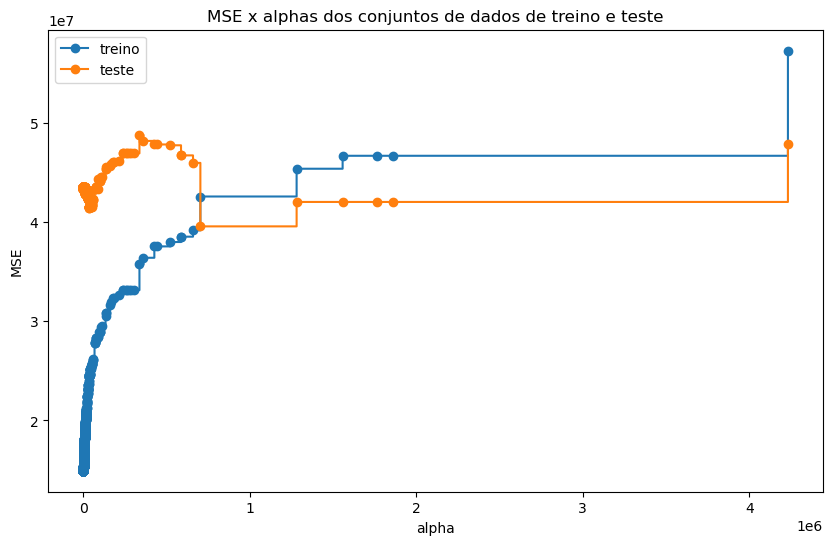

In [142]:
# Gráfico do MSE de cada árvore em função dos valores de alpha
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alphas dos conjuntos de dados de treino e teste")
ax.plot(ccp_alphas[:-1], MSE_treino[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], MSE_teste[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

O menor MSE da base de testes encontra-se em $alpha = 1x10^6$. Criemos uma árvore de regressão final com este valor de alpha na base de testes e calculemos sua profundidade, MSE e $R^2$.

In [143]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=1e6)
arvore_final.fit(X_treino, y_treino)

print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_teste, y_teste):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_teste, arvore_final.predict(X_teste)):.2f}")

Profundidade: 5
R-quadrado na base de testes: 0.33
MSE na base de testes: 41859561.44


Apesar do MSE apresentar um valor gigantes, o $R^2$ na base de testes foi superior aos obtidos nos métodos anteriores (era em torno de $0.27$, foi para $0.33$. Vamos imprimir a árvore final para conferir quais variáveis foram utilizadas.

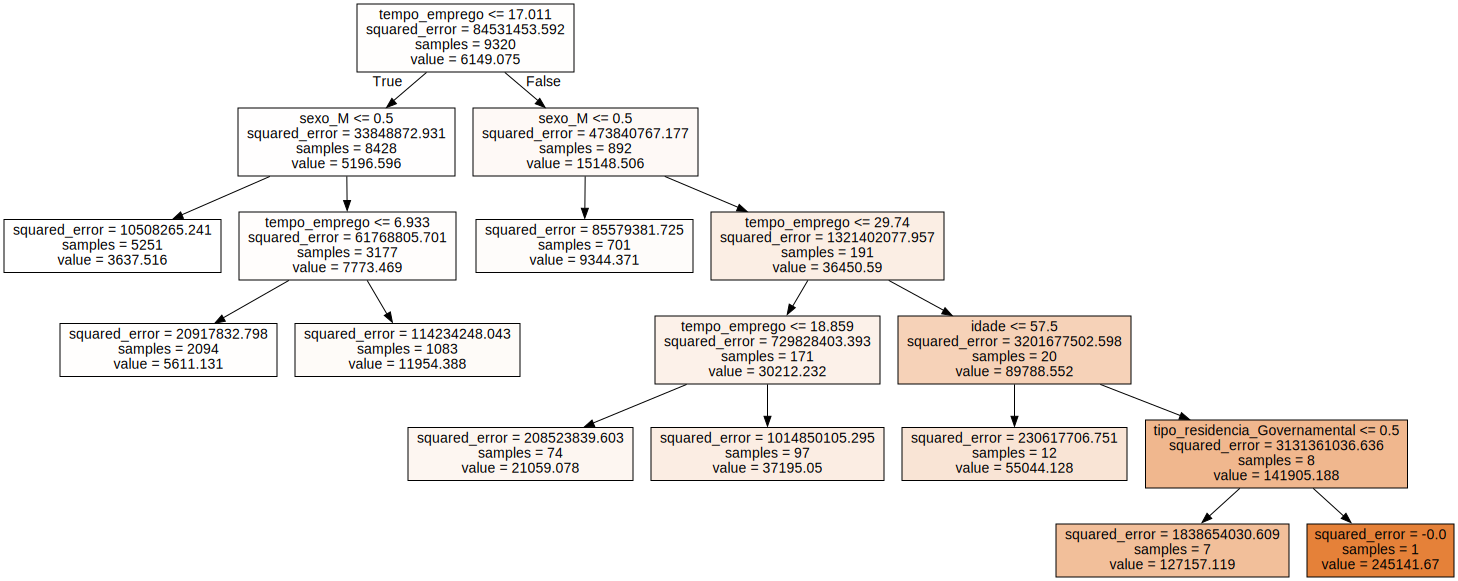

In [144]:
# Impressão da árvore final
# Dados da árvore
dados_arvore = tree.export_graphviz(arvore_final, out_file=None, 
                                    feature_names=X_teste.columns,
                                    filled=True)

# Impressão gráfica
grafico = graphviz.Source(dados_arvore, format="png") 
grafico

As variáveis consideradas no ajuste da ávore foram 'tempo_emprego', 'sexo', 'idade' e a categoria 'tipo_residencia_Governamental', com a última estando em contraste com os métodos anteriores, que utilizavam a 'educacao' ou 'tipo_renda' ao invés do 'tipo_residencia'. Em questão desta úlitma variável e dos altíssimos valores de MSE, apesar do ajuste da árvore apresentar um $R^2$ superior aos anteriores, provavelmente ocorreu um caso de overfitting neste método, implicando uma baixa confiança neste método em relação aos outros utilizados.